In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics #

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mhmmd-nauman/DataSets/master/wdbc/dsbc/csv/breast-cancer%20-%20complete.csv")

print(df.head)

<bound method NDFrame.head of        Age menopause tumor-size inv-nodes  ... breast  breast-quad irradiat Class
0    30-39   premeno      30-34       0-2  ...   left     left_low       no     B
1    40-49   premeno      20-24       0-2  ...  right     right_up       no     B
2    40-49   premeno      20-24       0-2  ...   left     left_low       no     B
3    60-69      ge40      15-19       0-2  ...  right      left_up       no     B
4    40-49   premeno        0-4       0-2  ...  right    right_low       no     B
..     ...       ...        ...       ...  ...    ...          ...      ...   ...
281  30-39   premeno      30-34       0-2  ...   left      left_up       no     M
282  30-39   premeno      20-24       0-2  ...   left      left_up      yes     M
283  60-69      ge40      20-24       0-2  ...  right      left_up       no     M
284  40-49      ge40      30-34       3-5  ...   left     left_low       no     M
285  50-59      ge40      30-34       3-5  ...   left     left_low  

In [ ]:
#df=df[df.columns[:-1]]

In [ ]:
df.head()

,Age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,B
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,B
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,B
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,B
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,B


In [ ]:
#df['Application Status'] = df['Application Status'].map({'Complete':1,'NotComplete':0})
#df['Offered'] = df['Offered'].map({'Yes':1,'No':0})
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
df['Age'] = labelencoder_X_1.fit_transform(df['Age'])
df['menopause'] = labelencoder_X_1.fit_transform(df['menopause'])
df['tumor-size'] = labelencoder_X_1.fit_transform(df['tumor-size'])
df['inv-nodes'] = labelencoder_X_1.fit_transform(df['inv-nodes'])
df['node-caps'] = labelencoder_X_1.fit_transform(df['node-caps'])

df['deg-malig'] = labelencoder_X_1.fit_transform(df['deg-malig'])
df['breast'] = labelencoder_X_1.fit_transform(df['breast'])

df['breast-quad'] = labelencoder_X_1.fit_transform(df['breast-quad'])
df['irradiat'] = labelencoder_X_1.fit_transform(df['irradiat'])
df['Class'] = labelencoder_X_1.fit_transform(df['Class'])

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
df = clean_dataset(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


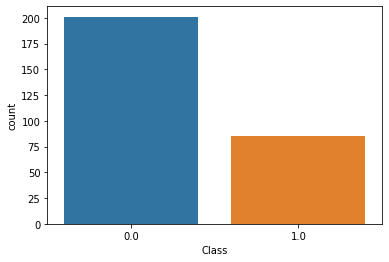

In [ ]:
sns.countplot(df['Class'],label="Count")

In [ ]:
X = df.drop('Class',axis=1)
y = df.Class

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (200, 9)
X_test:  (86, 9)
y_train:  (200,)
y_test:  (86,)


In [ ]:
#NB
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.6976744186046512


In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sp = tn / (tn+fp)
Sn = tp/(tp + fn)

In [ ]:
print(cm)
print(Sp)
print(Sn)

[[48 14]
 [12 12]]
0.7741935483870968
0.5


In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, y_pred)
print(cohen_score)

0.2673656618610748


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
models = []
models.append(( ' LR ' , LogisticRegression()))
#models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' RF ' , RandomForestClassifier()))
models.append(( ' NB ' , GaussianNB()))
#models.append(( ' SVM ' , SVC()))

results = []
names = []

for name, model in models:
    Kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=Kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std());
    print(msg)

 LR : 0.735000 (0.055000)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 KNN : 0.715000 (0.070887)
 RF : 0.740000 (0.088882)
 NB : 0.715000 (0.055000)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipelines = []
#pipelines.append(( ' ScaledLR ' , Pipeline([( 'Scaler' , StandardScaler()),( ' LR ' ,
#LogisticRegression())])))
#pipelines.append(( ' ScaledLDA ' , Pipeline([( 'Scaler' , StandardScaler()),( ' LDA ' ,
#LinearDiscriminantAnalysis())])))
pipelines.append(( ' ScaledKNN ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' KNN ' ,
KNeighborsClassifier())])))
pipelines.append(( ' ScaledRF ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' RandomForest ' ,
RandomForestClassifier())])))
pipelines.append(( ' ScaledNB ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' NB ' ,
GaussianNB())])))
#pipelines.append(( ' ScaledSVM ' , Pipeline([( ' Scaler' , StandardScaler()),( ' SVM ' , SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 ScaledKNN : 0.705000 (0.085000)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


 ScaledRF : 0.720000 (0.074833)
 ScaledNB : 0.715000 (0.055000)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
